<a href="https://colab.research.google.com/github/himanshu91b/Google_Colab_ML_Models/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

import skimage
from skimage.io import imread
from skimage.transform import resize
import matplotlib.cm as cm

print(__doc__)

from sklearn.metrics import plot_confusion_matrix

Automatically created module for IPython interactive environment


In [ ]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [ ]:
! unzip SVMdataset.zip

Archive:  SVMdataset.zip
   creating: SVMdataset/Bacterial leaf blight/
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0365.JPG  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0366.jpg  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0367.JPG  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0370.jpg  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0372.JPG  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0374.JPG  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0376.JPG  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0377.JPG  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0378.JPG  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0379.JPG  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0381.JPG  
  inflating: SVMdataset/Bacterial leaf blight/contrast_0.8_DSC_0383.JPG  
  inflating: SVMdataset/Bacterial leaf b

In [ ]:
image_dataset = load_image_files("/content/SVMdataset")

In [ ]:
image_dataset = load_image_files("/content/drive/My Drive/thesis/dataset/train")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)
print()

[2 2 0 0 2 2 1 2 0 0 0 1 2 1 2 2 2 0 0 2 2 2 0 0 1 2 2 1 2 2 0 2 2 2 1 1 1
 0 2 2 0 2 2 1 1 2 0 1 1 2 0 2 2 1 2 2 0 1 0 1 2 2 2 0 0 0 0 0 0 0 2 0 0 2
 1 2 2 0 0 1 1 1 2 2 2 2 0 1 2 2 2 0 2 2 2 0 1 0 0 2 2 0 0 2 0 2 0 0 0 2 2
 0 1 1 2 1 0 0 1 2 1 2 1 2 0 2 1 2 0 0 0 0 1 2 1 2 2 1 1 0 1 0 1 1 0 2 2 0
 1 0 2 2 1 1 0 0 0 2 0 0 0 1 2 0 2 2 2 0 2 2 2 1 2 2 1 2 1 1 2 2 2 0 2 2 1
 1 2 0 0]



In [ ]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        57
           1       0.84      0.57      0.68        67
           2     

Confusion matrix, without normalization
[[41  6 10]
 [14 38 15]
 [ 7  1 57]]
Normalized confusion matrix
[[0.71929825 0.10526316 0.1754386 ]
 [0.20895522 0.56716418 0.2238806 ]
 [0.10769231 0.01538462 0.87692308]]


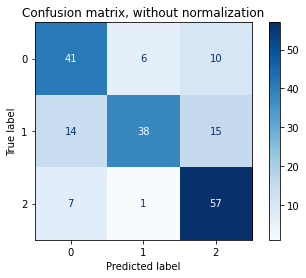

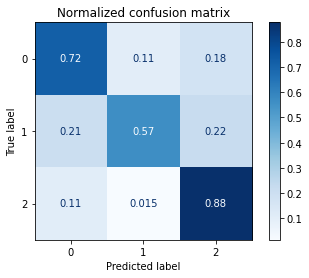

In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()